<a href="https://colab.research.google.com/github/busung/Remote_Intern/blob/main/%EC%A4%91%EA%B3%A0%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"busunglee","key":"23ded33791d38e7bebdf0429fcd5c2a7"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         55           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        100           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        617           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        130           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1226           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      15105            True  
house-pr

In [ ]:
! kaggle competitions download -c used-car-price-prediction

100% 385M/385M [00:03<00:00, 116MB/s]
100% 385M/385M [00:03<00:00, 118MB/s]


In [ ]:
!ls

kaggle.json  sample_data  used-car-price-prediction.zip


In [ ]:
!unzip used-car-price-prediction.zip

Archive:  used-car-price-prediction.zip
  inflating: used_cars_sample_submission.csv  
  inflating: used_cars_test.csv      
  inflating: used_cars_train.csv     


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("used_cars_train.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270535 entries, 0 to 270534
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            270535 non-null  int64  
 1   url           270535 non-null  object 
 2   region        270535 non-null  object 
 3   region_url    270535 non-null  object 
 4   price         270535 non-null  int64  
 5   year          269774 non-null  float64
 6   manufacturer  259604 non-null  object 
 7   model         267437 non-null  object 
 8   condition     166900 non-null  object 
 9   cylinders     160765 non-null  object 
 10  fuel          268818 non-null  object 
 11  odometer      269001 non-null  float64
 12  title_status  265274 non-null  object 
 13  transmission  269338 non-null  object 
 14  VIN           166298 non-null  object 
 15  drive         188014 non-null  object 
 16  size          75177 non-null   object 
 17  type          212266 non-null  object 
 18  pain

In [ ]:
data.fuel.unique()

array(['gas', 'other', 'diesel', 'hybrid', nan, 'electric'], dtype=object)

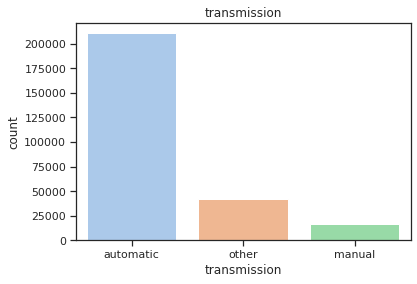

In [ ]:
sns.countplot(data = data, x = "transmission")
plt.title("transmission")
plt.show()

# EDA 및 FEATURE ENGINEERING

## MANUFACTURER
제조사별로 분명 유의미한 가격차이가 있음  
하지만 상위 가격의 제조사들은 그 양은 적지만 가격이 상당히 튀는 모습을 볼 수 있음  
=> 거래량이 많은 상위 30개의 제조사만 사용하자
=> 훨씬 더 안정적인 가격을 형성하고 있기에 중고차에 중요한 영향을 주는 요소를 뽑을 수 있음

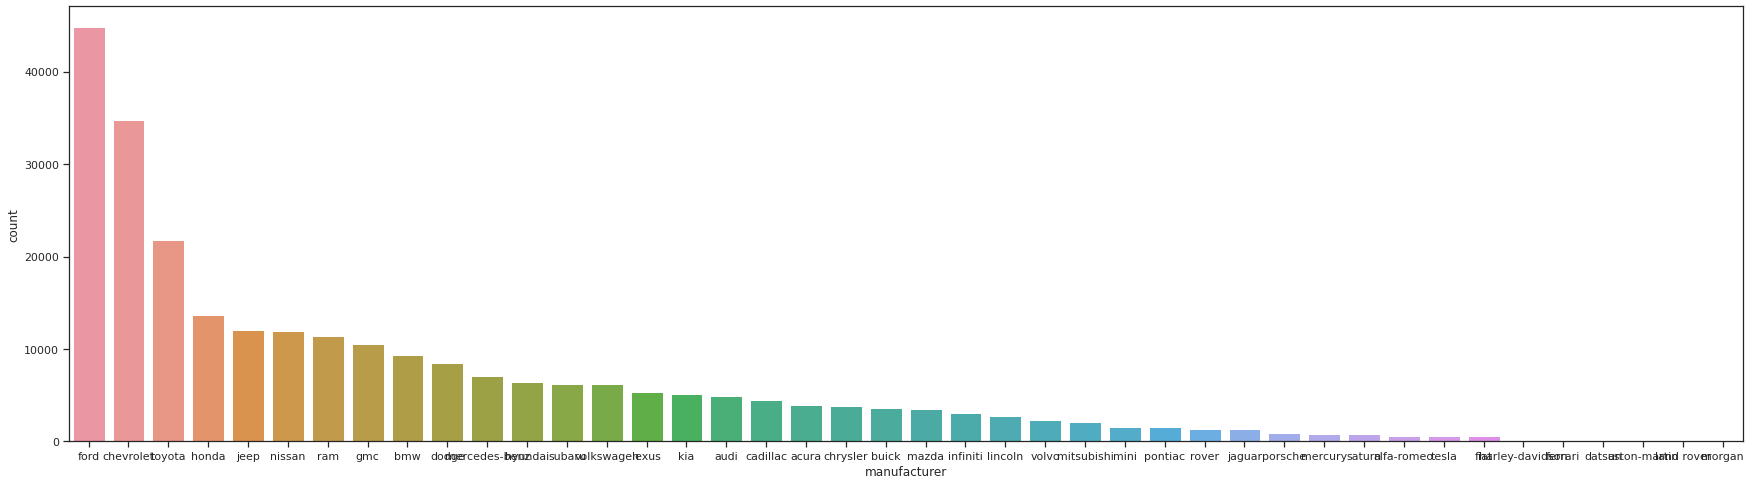

In [ ]:
plt.figure(figsize=(30,8))

sns.countplot(data=data, x="manufacturer",order = data.manufacturer.value_counts().index)

In [ ]:
top_30 = data.manufacturer.value_counts().sort_values(ascending=False).index[0:30]

In [ ]:
order = data.groupby(["manufacturer"])["price"].median().sort_values(ascending=False).index
order

Index(['ferrari', 'aston-martin', 'tesla', 'ram', 'porsche', 'alfa-romeo',
       'jaguar', 'rover', 'audi', 'gmc', 'infiniti', 'datsun', 'lexus',
       'acura', 'mercedes-benz', 'lincoln', 'jeep', 'bmw', 'cadillac', 'ford',
       'chevrolet', 'mitsubishi', 'volvo', 'toyota', 'mini', 'buick',
       'harley-davidson', 'kia', 'dodge', 'volkswagen', 'subaru', 'hyundai',
       'fiat', 'nissan', 'mazda', 'honda', 'chrysler', 'land rover', 'pontiac',
       'mercury', 'saturn', 'morgan'],
      dtype='object', name='manufacturer')

In [ ]:
order[1:31]

Index(['aston-martin', 'tesla', 'ram', 'porsche', 'alfa-romeo', 'jaguar',
       'rover', 'audi', 'gmc', 'infiniti', 'datsun', 'lexus', 'acura',
       'mercedes-benz', 'lincoln', 'jeep', 'bmw', 'cadillac', 'ford',
       'chevrolet', 'mitsubishi', 'volvo', 'toyota', 'mini', 'buick',
       'harley-davidson', 'kia', 'dodge', 'volkswagen', 'subaru'],
      dtype='object', name='manufacturer')

In [ ]:
count_list = data.manufacturer.value_counts()
temp=count_list.reset_index()
count = []

for i in order:
  count.append(temp[temp["index"]==i].manufacturer.values)

count_text = [int(x) for x in count]
count_text = [str(x) for x in count]

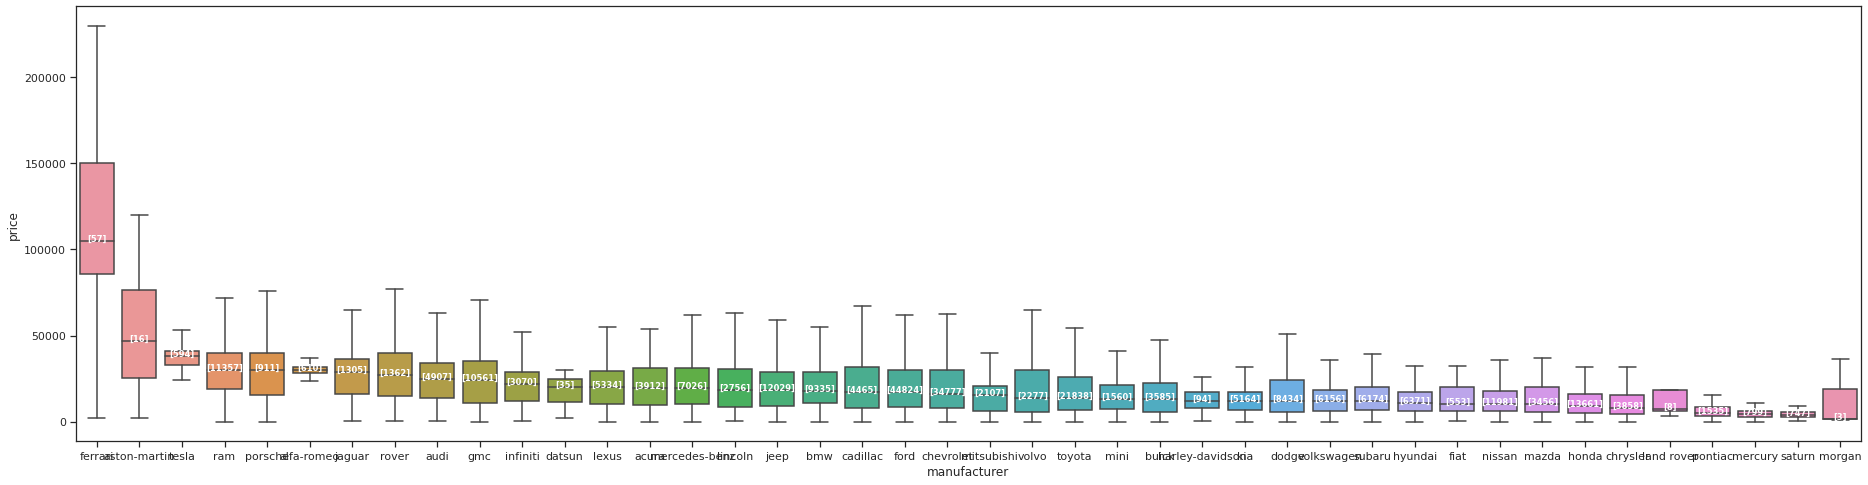

In [ ]:
#숫자 = 거래량
plt.figure(figsize=(32,8))

order = data.groupby(["manufacturer"])["price"].median().sort_values(ascending=False).index

ax = sns.boxplot(data = data, x="manufacturer",y="price",showfliers=False,order = order)
medians = data.groupby(["manufacturer"])["price"].median().sort_values(ascending=False).values
pos = range(len(count_text))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            count_text[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')

plt.show()

In [ ]:
mask = data.manufacturer.apply(lambda x : x in top_30)

In [ ]:
data_30 = data[mask]

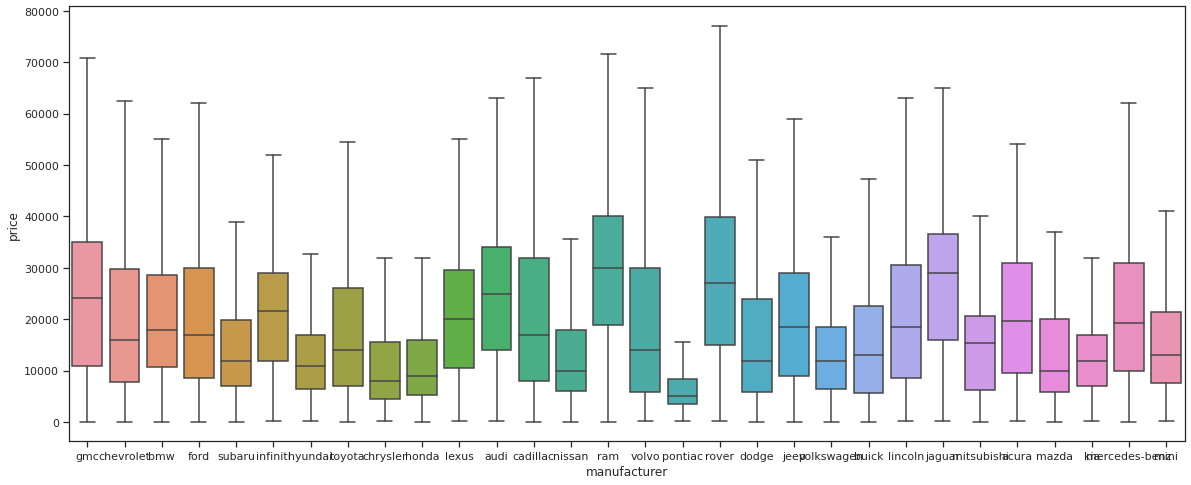

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data = data_30, x= "manufacturer",y="price",showfliers=False)

## TYPE
TYPE별 유의미한 가격차를 보여 줌

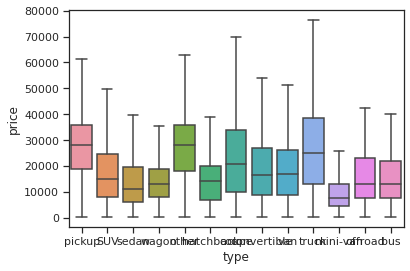

In [ ]:
sns.boxplot(data = data_30, x = "type", y = "price", showfliers=False)

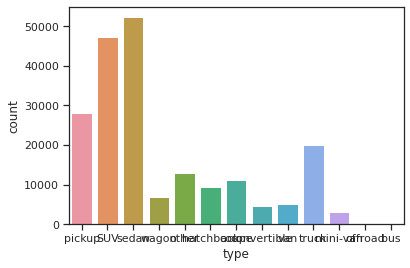

In [ ]:
sns.countplot(data = data_30, x = "type")

In [ ]:
data_30.type.unique()

array(['pickup', nan, 'SUV', 'sedan', 'wagon', 'other', 'hatchback',
       'coupe', 'convertible', 'van', 'truck', 'mini-van', 'offroad',
       'bus'], dtype=object)

##  MODEL (각 제조사의 모델별 가격 차이가 있는지 확인)
* 모델이 너무 많은 제조사가 있어서...일정 수 이상의 거래가 된 차에 대하여 모델별 차이가 있는지 확인
* 모델별로 분명히 가격차이가 있음...하지만 같은 표기 오류가 너무 많고 그 수가 너무 많아 자칫 사용할 TREE 기반 모델에 안 좋은 영향을 줄 확률이 높음

=> 모델은 사용하지 않기로 함

In [ ]:
import tqdm

In [ ]:
temp_data = data[data.manufacturer == "ford"]

order = temp_data.groupby(["model"])["price"].median().sort_values(ascending=False).index
len(order)

3065

  0%|          | 0/43 [00:00<?, ?it/s]

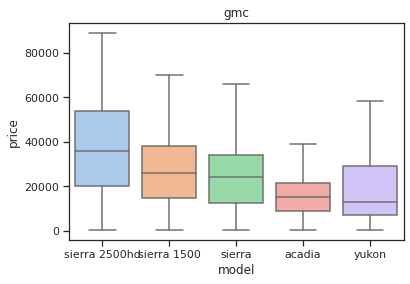

  2%|▏         | 1/43 [00:00<00:09,  4.39it/s]

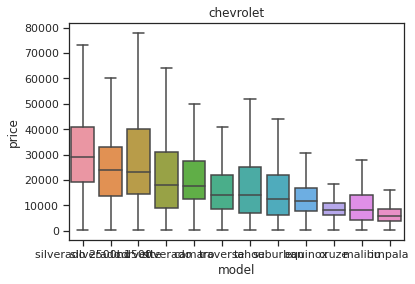

  5%|▍         | 2/43 [00:00<00:17,  2.40it/s]

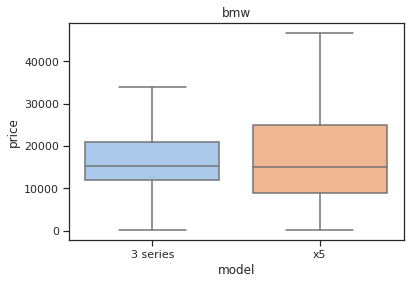

  7%|▋         | 3/43 [00:00<00:12,  3.18it/s]

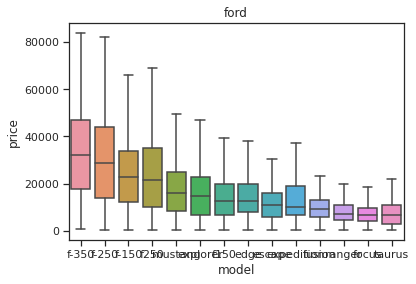

  9%|▉         | 4/43 [00:01<00:13,  2.84it/s]

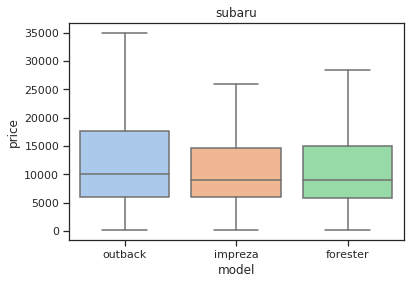

 12%|█▏        | 5/43 [00:01<00:11,  3.32it/s]

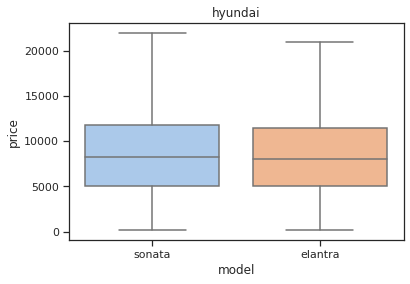

 16%|█▋        | 7/43 [00:01<00:07,  4.89it/s]

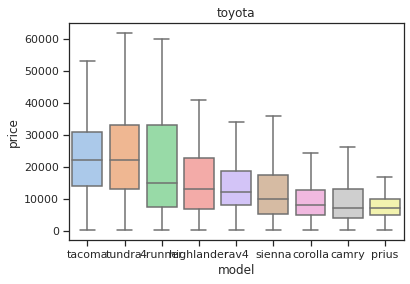

 19%|█▊        | 8/43 [00:02<00:08,  4.20it/s]

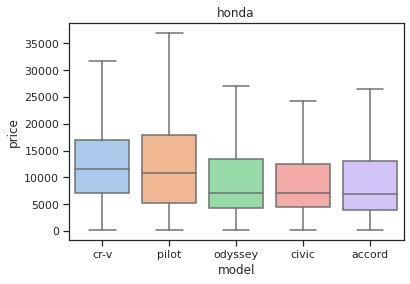

 30%|███       | 13/43 [00:02<00:03,  8.25it/s]

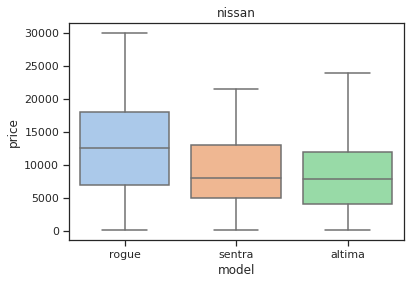

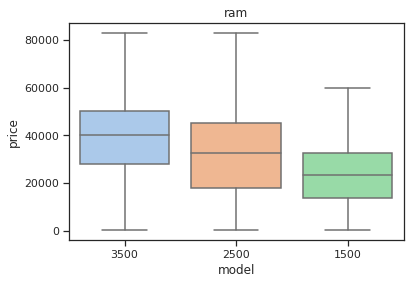

 35%|███▍      | 15/43 [00:02<00:04,  6.71it/s]

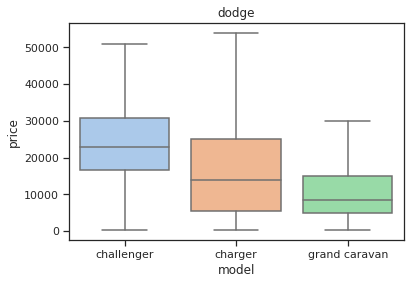

 44%|████▍     | 19/43 [00:03<00:02,  8.79it/s]

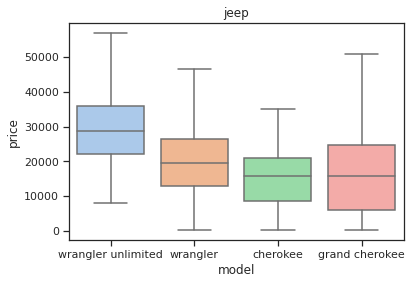

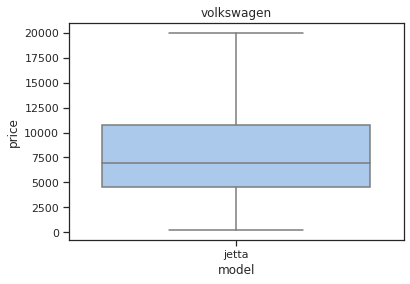

 65%|██████▌   | 28/43 [00:03<00:01, 14.13it/s]

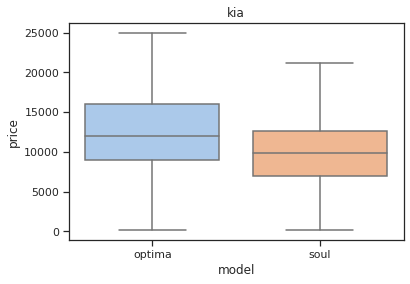

 72%|███████▏  | 31/43 [00:04<00:00, 13.66it/s]

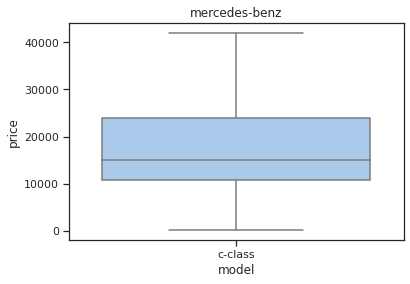

100%|██████████| 43/43 [00:04<00:00,  9.42it/s]


In [ ]:
manufac = data.manufacturer.unique()

for i in tqdm.tqdm(manufac):
  temp_data = data[data.manufacturer == i]
  frame = pd.DataFrame(temp_data.model.value_counts()).reset_index()
  #거래가 500번 이상 일어난 차들만
  index = frame[frame.model > 500]["index"]
  index = list(index)
  if len(index) > 0:
    mask = temp_data.model.apply(lambda x : x in index)
    real_data = temp_data[mask]

    order = real_data.groupby(["model"])["price"].median().sort_values(ascending=False).index

    sns.boxplot(data = real_data, x="model",y="price",showfliers=False,order = order)
    
    plt.title(i)
    plt.show()

    plt.close()

## Size
*full size = 준대형차  
*mid-size = 중형차  
*compact = 준중형차  
*sub - compact = compact보다 작은차  

사이즈별로 분명히 큰 차이는 존재하고 가장 많이 팔린 제조사(상위 5개)에 대하여 SIZE별 가격 비교를 했을 때 클 수록 가격이 상승하는 경향이 있었음

=> 하지만 결측치가 너무 많음
혹시 같은 모델이지만 SIZE가 누락된 경우가 있을 경우 이를 이용하여 결측치를 채우려 시도, 하지만 그런 모델은 존재하지 않았음

=> 너무 많은 결측치 때문에 학습 피쳐로 사용하지 않음

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

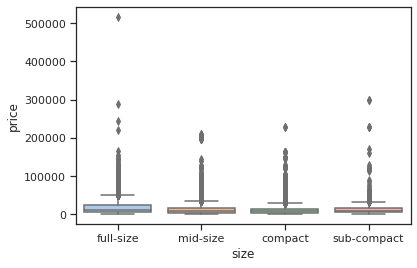

In [ ]:
sns.boxplot(data = data, x="size",y="price")

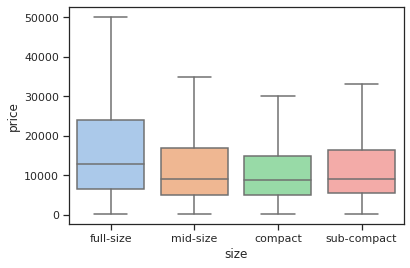

In [ ]:
sns.boxplot(data = data, x="size",y="price",showfliers=False)

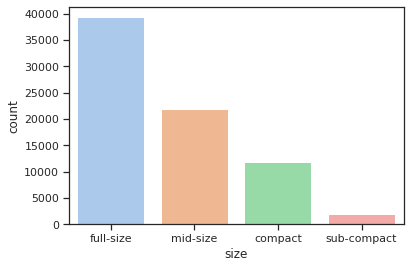

In [ ]:
sns.countplot(data = data,x="size")

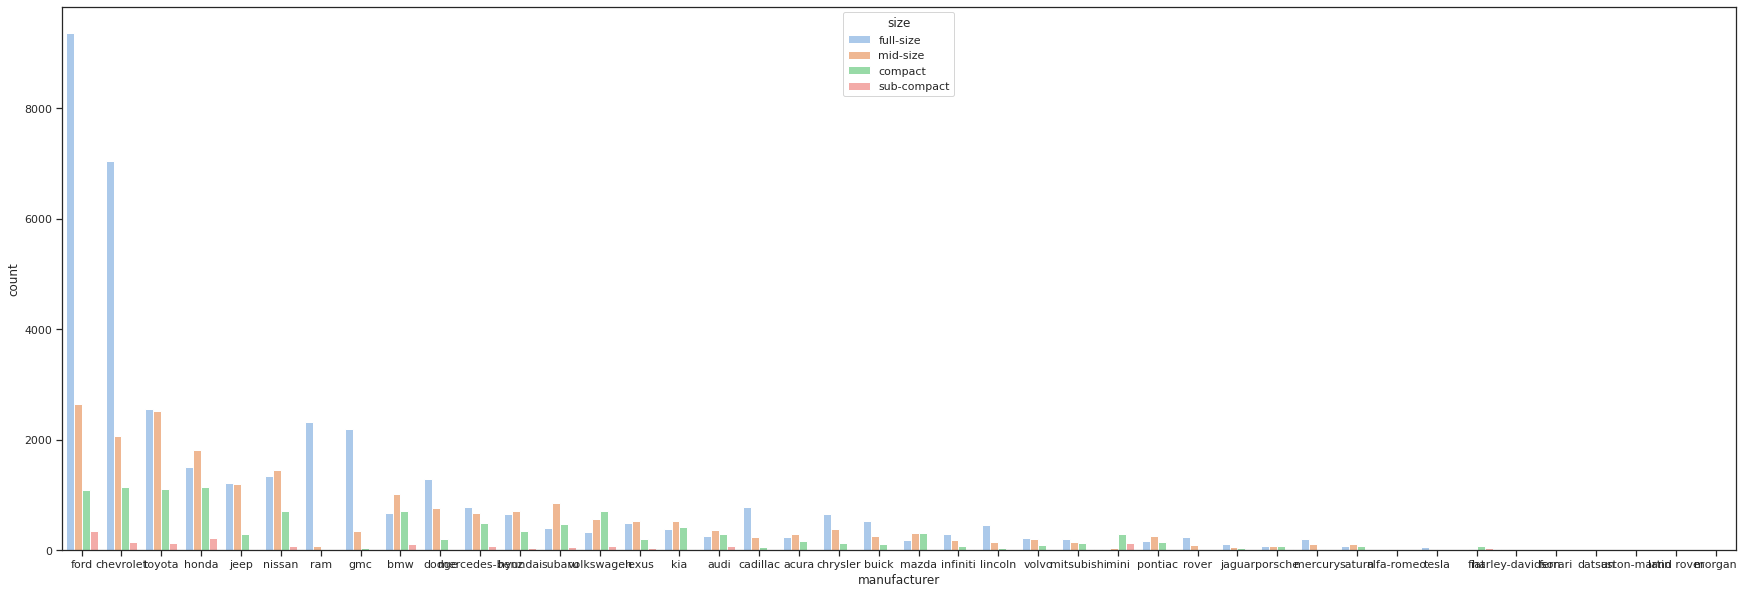

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(data = data , x = "manufacturer",hue="size",order = data.manufacturer.value_counts().index)

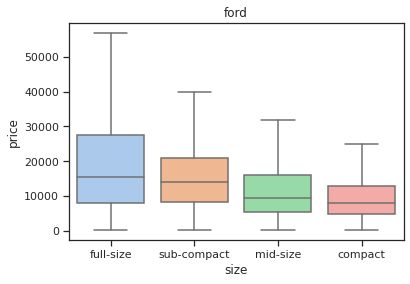

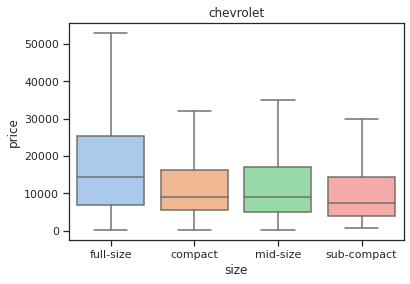

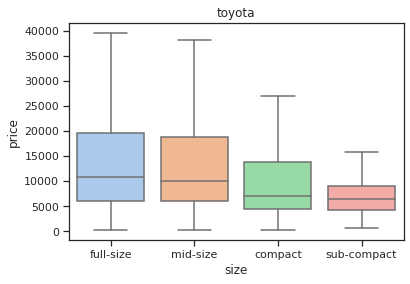

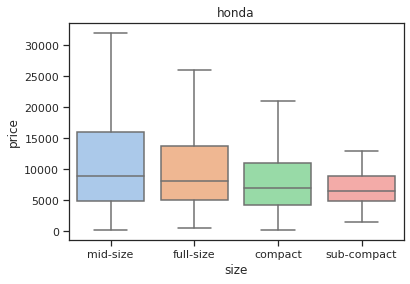

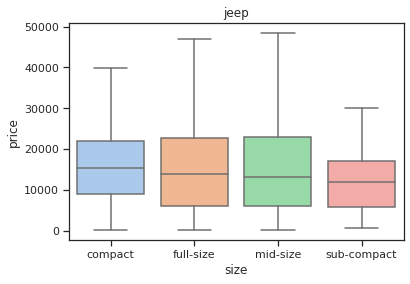

In [ ]:
top_5 = data.manufacturer.value_counts().sort_values(ascending=False).index[:5]

for i in top_5:
  order = data[data.manufacturer==i].groupby(["size"])["price"].median().sort_values(ascending=False).index
  ax = sns.boxplot(data = data[data.manufacturer==i],x="size",y="price",showfliers=False,order = order)
  plt.title(i)

  # for tick,label in zip(pos,ax.get_xticklabels()):
  #   ax.text(pos[tick],
  #           medians[tick] + 0.03,
  #           count_text[tick],
  #           horizontalalignment='center',
  #           size='x-small',
  #           color='w',
  #           weight='semibold')

  plt.show()
  plt.close()

### 비싼 자동차 제조사들은 어떤 종류의 차를 많이 생산할 지 알아봄

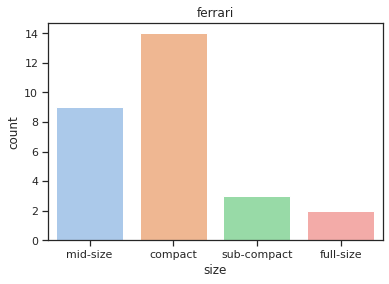

In [ ]:
sns.countplot(data = data[data.manufacturer =="ferrari"], x= "size")
plt.title("ferrari")
plt.show()

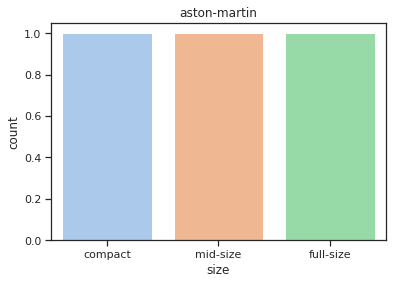

In [ ]:
sns.countplot(data = data[data.manufacturer =="aston-martin"], x= "size")
plt.title("aston-martin")
plt.show()

In [ ]:
data[data.manufacturer =="aston-martin"].model.unique()

array(['martin v8 vantage s', 'martin db11', 'martin db7 volante',
       'martin db9', 'martin vantage', 'martin vanquish',
       'martin rapide s'], dtype=object)

In [ ]:
data[data.manufacturer =="aston-martin"][["size","model"]]

,size,model
15033,compact,martin v8 vantage s
35399,NaN,martin db11
42304,mid-size,martin db7 volante
45822,full-size,martin db9
51418,NaN,martin db9
59257,NaN,martin vantage
62817,NaN,martin vanquish
80934,NaN,martin rapide s
83122,NaN,martin db9
113220,NaN,martin rapide s


In [ ]:
data[data.manufacturer =="aston-martin"]["size"]

15033       compact
35399           NaN
42304      mid-size
45822     full-size
51418           NaN
59257           NaN
62817           NaN
80934           NaN
83122           NaN
113220          NaN
132750          NaN
185360          NaN
239226          NaN
255874          NaN
263970          NaN
267788          NaN
Name: size, dtype: object

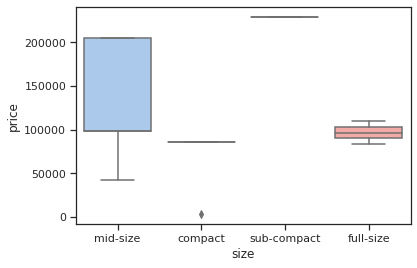

In [ ]:
 sns.boxplot(data = data[data.manufacturer =="ferrari"], x = "size", y = "price")

## Color
* 색에 따른 차이가 있을지 조사


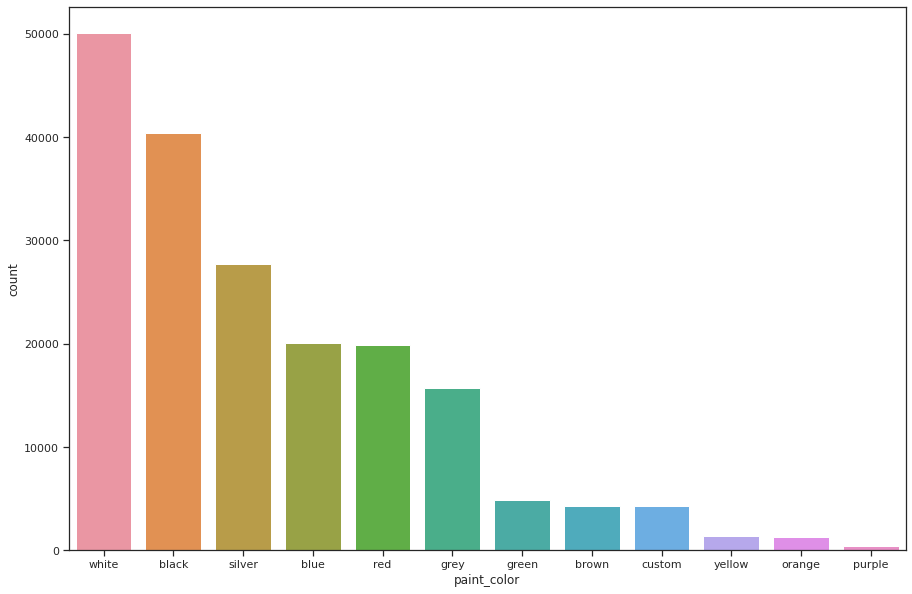

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data = data,x = "paint_color",order = data.paint_color.value_counts().sort_values(ascending = False).index)

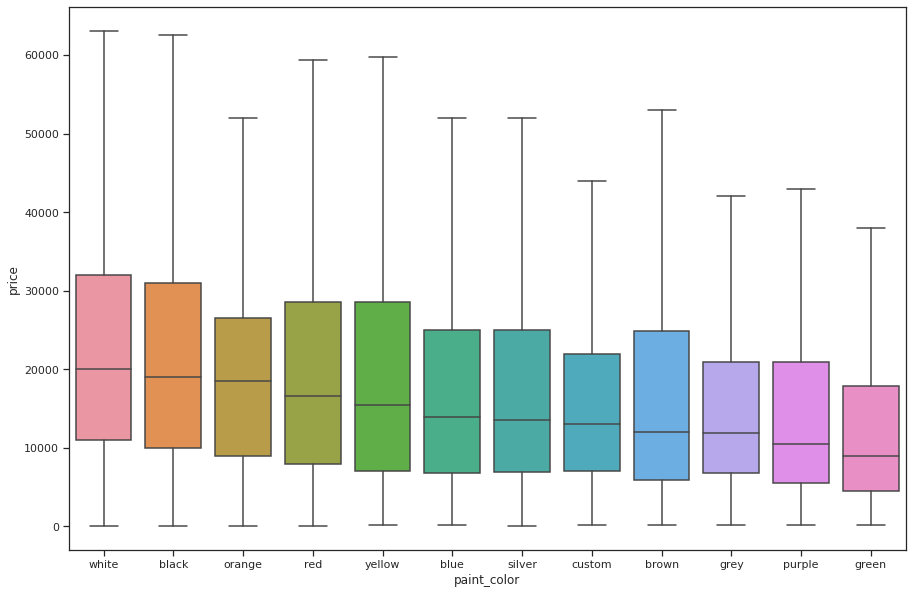

In [ ]:
order = data.groupby(["paint_color"])["price"].median().sort_values(ascending=False).index

plt.figure(figsize=(15,10))
sns.boxplot(data=data, x="paint_color",y="price",order = order,showfliers=False)

## 상위 5개의 제조사 별로 색의 차이가 있는지 
* 단순히 색별로 수요가 차이가 나는건지 아니면 단순히 비싼 제조사에서 제조한 차들이 이런 색을 가지는지
=> 색이 중요한 요소인지를 파악해야함  

분명 색별로 가격차이는 있으나 상위 5개의 제조사를 조사해 보았을 때 가격 차이에 대한 규칙성이 없음  
뿐만 아니라 결측치가 너무 많아 그 영향을 파악하기 더 힘듬  
=> 피쳐 제외

In [ ]:
top_5 = data.manufacturer.value_counts().sort_values(ascending=False).index[:5]

In [ ]:
mask = data.manufacturer.apply(lambda x: x in top_5)

top_5_data = data[mask]

<Figure size 1440x720 with 0 Axes>

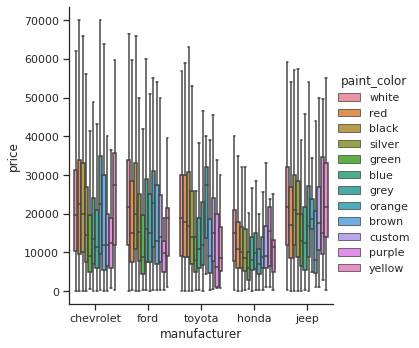

In [ ]:
plt.figure(figsize=(20,10))
sns.catplot(data = top_5_data, x = "manufacturer", y="price", hue = "paint_color",showfliers=False,kind = "box")
plt.show()

In [ ]:
manufac = top_5_data.manufacturer.unique()

for i in tqdm.tqdm(manufac):
  temp_data = top_5_data[top_5_data.manufacturer == i]
  order = temp_data.groupby(["paint_color"])["price"].median().sort_values(ascending=False).index

  sns.boxplot(data = temp_data, x="paint_color",y="price",showfliers=False,order = order)
  # path = "/content/Untitled Folder/"
  filename = i + "with color.png"
  plt.title(i)
  plt.show()

  plt.savefig(i, dpi = 300)
  plt.close()

## year
* 1980년 대 이후 차들부터 그 거래량이 많으며 가격 역시 1980년대 이후로 일정한 패턴을 가지고 안정되는 형태를 보임

=> 1980년 대 이후 데이터를 활용

In [ ]:
data_30=data_30[~data_30.year.isna()]

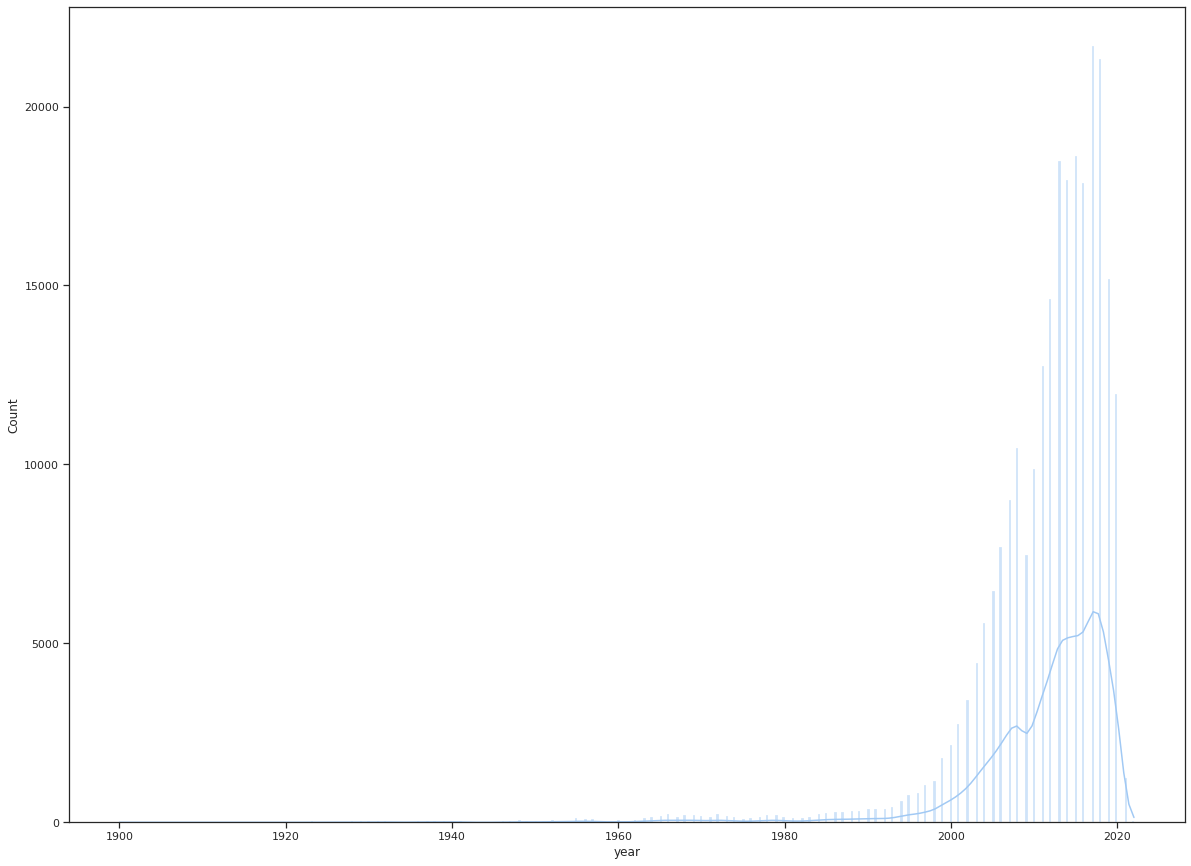

In [ ]:
plt.figure(figsize=(20,15))
sns.histplot(data =data_30, x="year",kde=True)

In [ ]:
mini_data = data_30.groupby(["year"])["price"].median().reset_index()

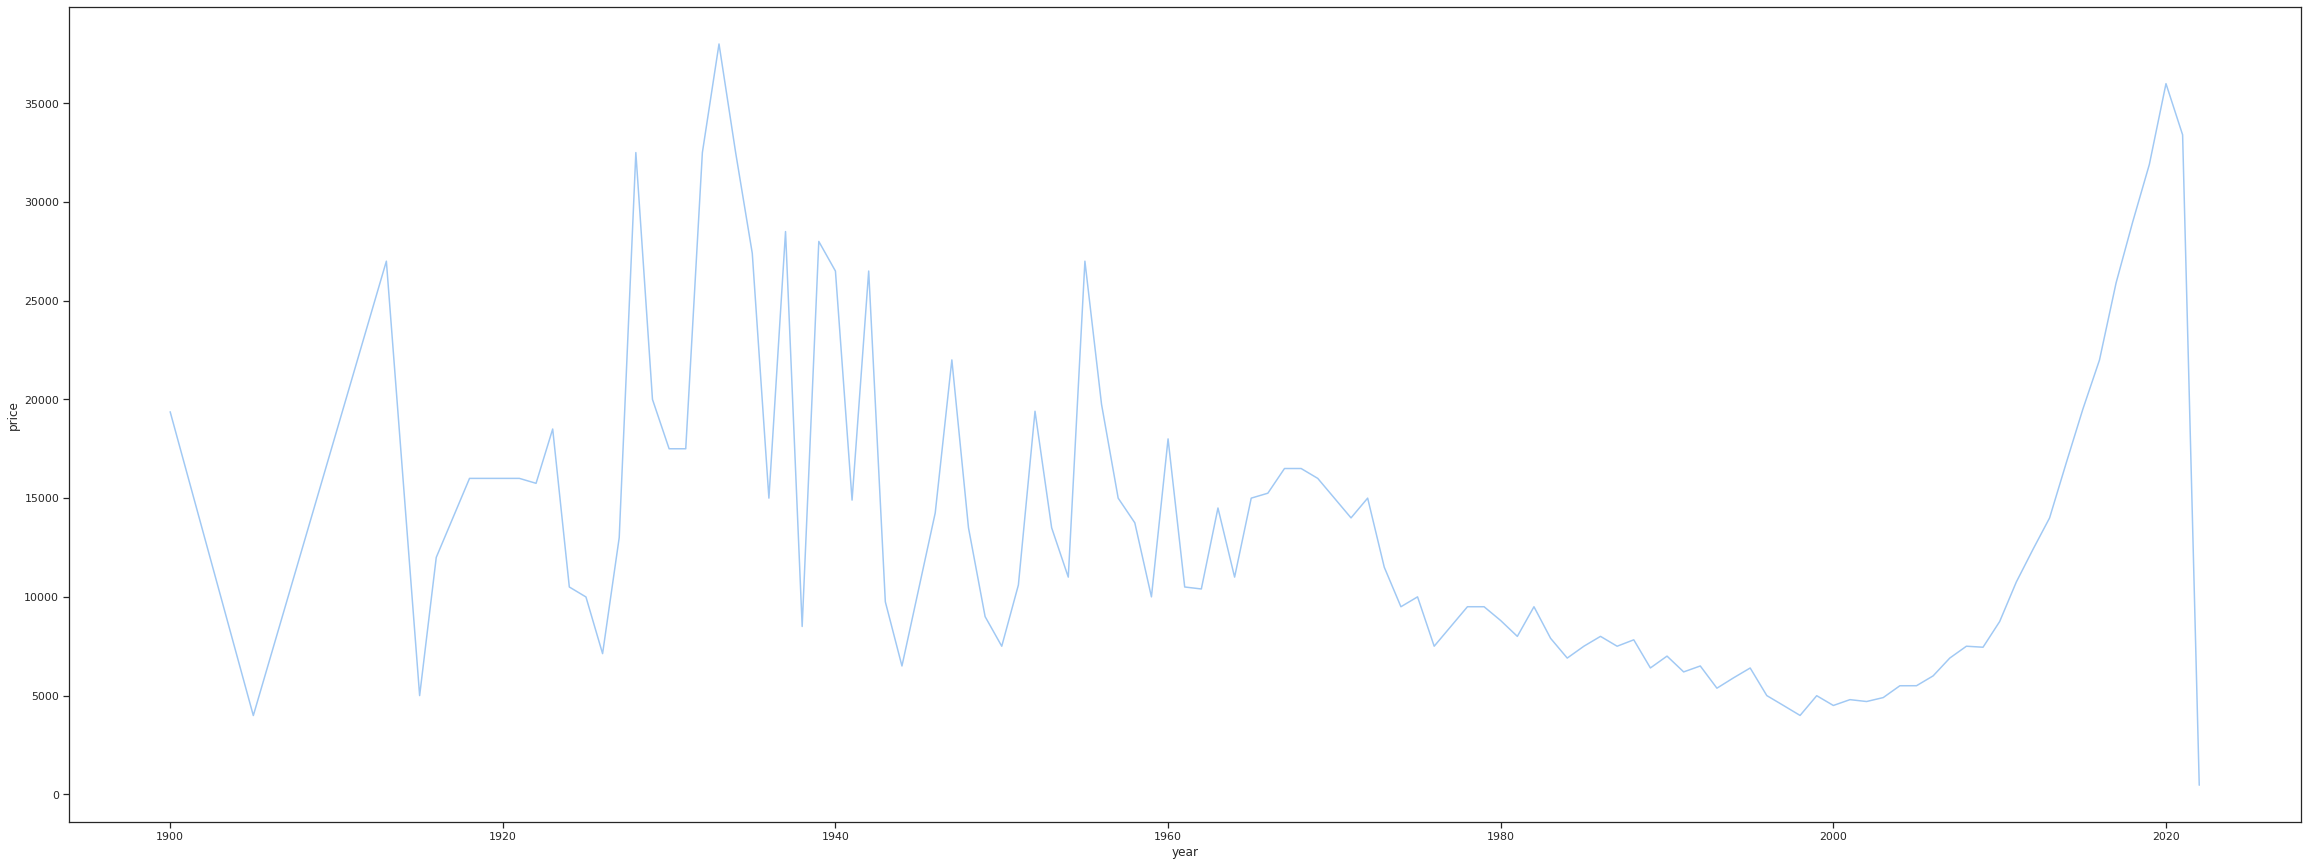

In [ ]:
plt.figure(figsize=(40,15))
sns.lineplot(data = mini_data, x = "year",y="price")

In [ ]:
mini_data

,year,price
0,1900.0,19375.0
1,1905.0,3990.0
2,1913.0,27000.0
3,1915.0,5000.0
4,1916.0,12000.0
...,...,...
102,2018.0,28990.0
103,2019.0,31900.0
104,2020.0,35990.0
105,2021.0,33397.0


In [ ]:
type(mini_data.year[0])

numpy.float64

In [ ]:
type(data_30.year[0])

numpy.float64

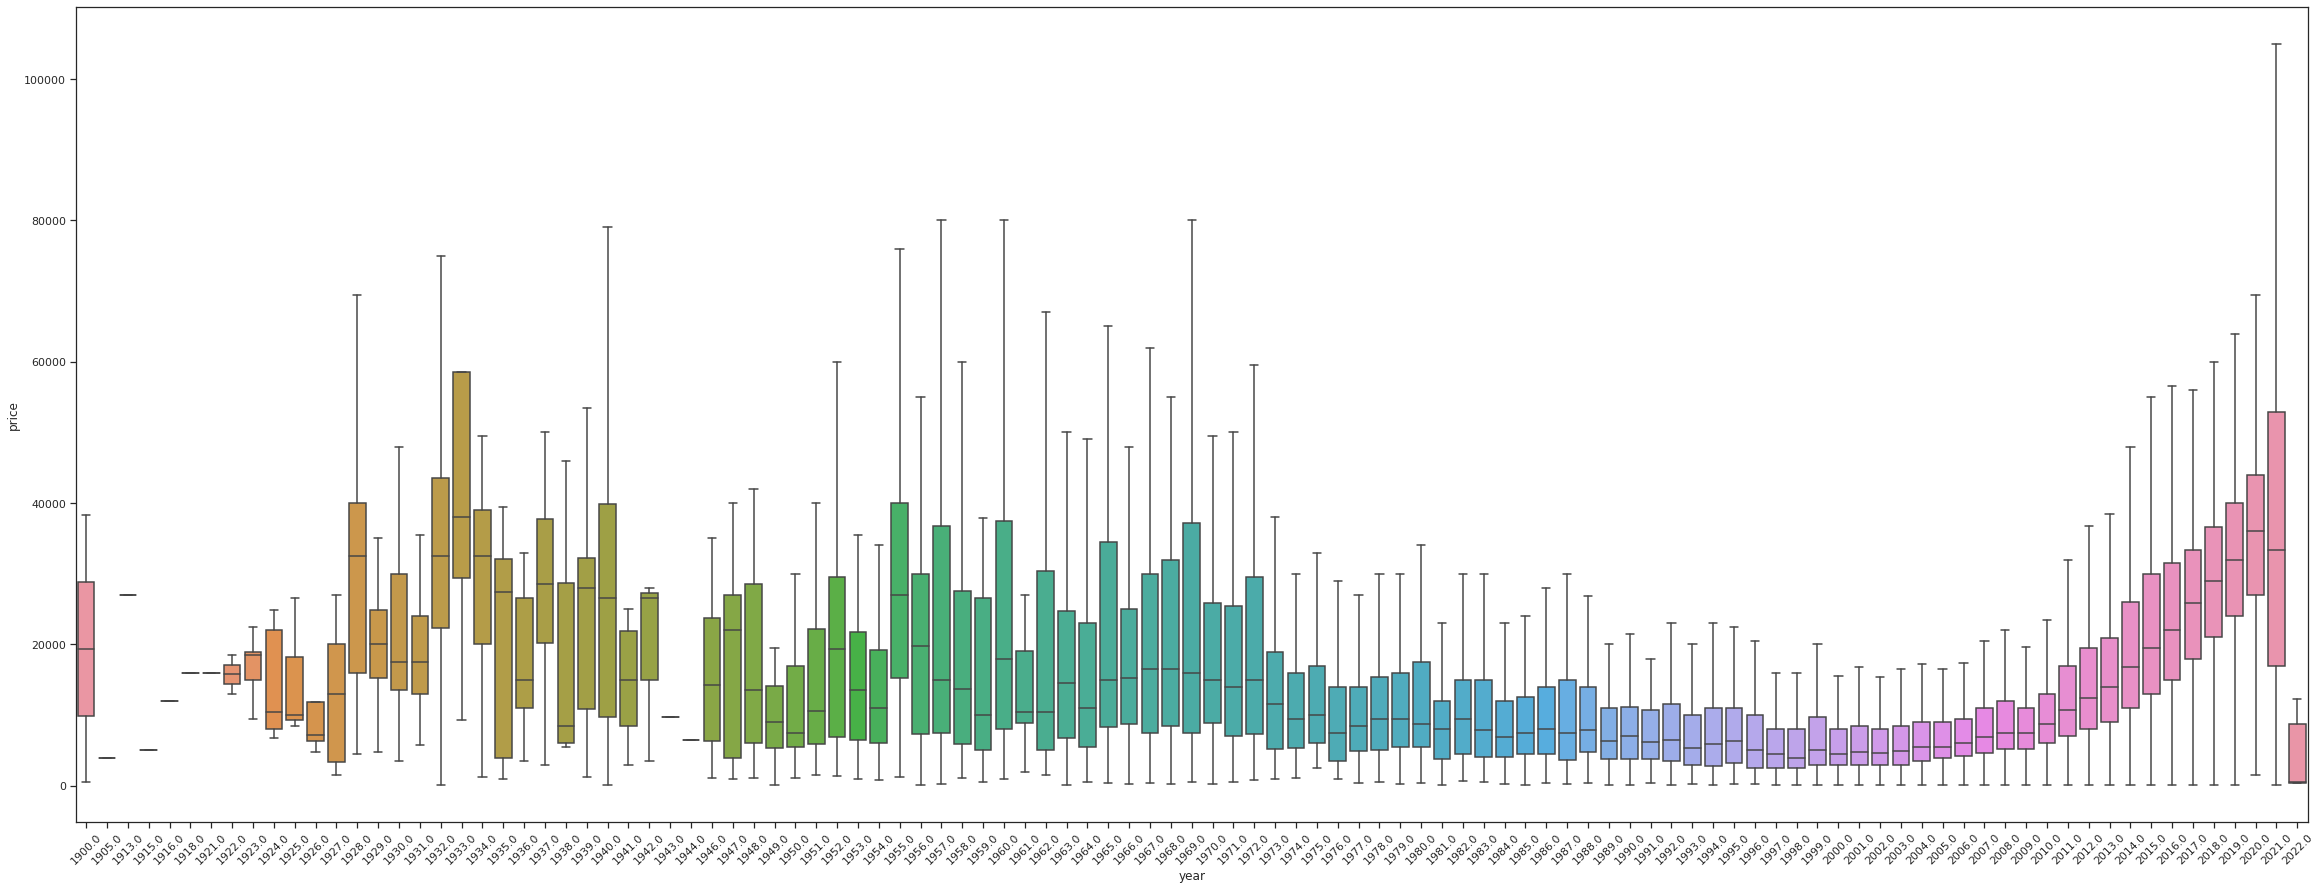

In [ ]:
plt.figure(figsize=(40,15))


sns.boxplot(data =data_30, x="year",y="price",showfliers=False)
plt.xticks(rotation=45)
plt.show()

In [ ]:
data_30.date

0         2008
1         2004
2         2018
3         1948
4         2016
          ... 
270529    2017
270530    2014
270532    2020
270533    2011
270534    2011
Name: year, Length: 255175, dtype: object

In [ ]:
data_30 = data_30[data_30.year >= 1980]

## TITLE STATUS와 CONDITION
* TITLE STATUS가 너무 편향되어 있어 변수로 사용하기 불가
* CONDITION은 데이터의 편향성은 적으나 결측치가 너무 많음  
=> TITLE STATUS와 CONDITION과의 관계를 활용하여 CONDITION의 결측치를 채워 NEW_CONDITION을 제작

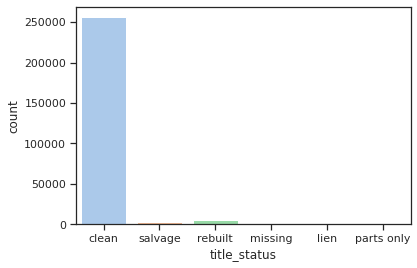

In [ ]:
#전체 데이터에 대한 TITLE_STATUS
#편향되어 있는 것을 확인 할 수 있음
sns.countplot(data = data , x = "title_status")

In [ ]:
data.title_status.value_counts()

clean         256066
rebuilt         4946
salvage         2637
lien             985
missing          518
parts only       122
Name: title_status, dtype: int64

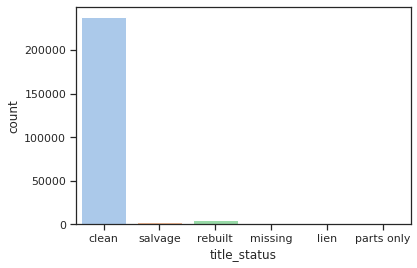

In [ ]:
sns.countplot(data = data_30, x = "title_status")

In [ ]:
data_30.groupby(["title_status"])["price"].count()

title_status
clean         237683
lien             906
missing          225
parts only        72
rebuilt         4689
salvage         2468
Name: price, dtype: int64

In [ ]:
data_30.groupby(["condition"])["price"].count()

condition
excellent    60416
fair          3687
good         75926
like new     12760
new            648
salvage        344
Name: price, dtype: int64

In [ ]:
order = data_30.groupby(["title_status"])["price"].median().sort_values(ascending=False).index
order

Index(['lien', 'clean', 'rebuilt', 'salvage', 'missing', 'parts only'], dtype='object', name='title_status')

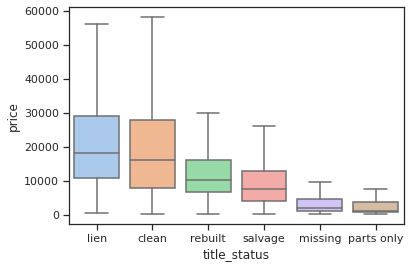

In [ ]:
sns.boxplot(data = data_30, x="title_status",y="price",showfliers=False,order=order)

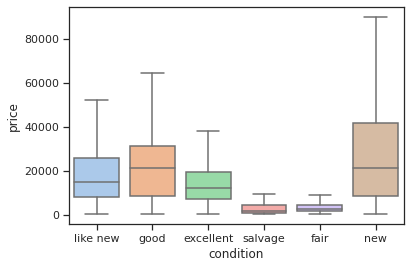

In [ ]:
#CONDTION과 TITLE_STATUS에 대한 가격차이는 분명히 존재함
sns.boxplot(data = data_30, x="condition",y="price",showfliers=False)

### TITLE STATUS와 CONDITION의 비율 계산 및 비율에 맞는 CONDTION 랜덤 추출
* PIVOT을 제작하여 값 빈도를 가중치로 사용, 랜덤으로 추출
* 비율을 유지했다는 그래프는 PPT에 

In [ ]:
temp = data_30[["condition","title_status"]]

In [ ]:
temp=temp[~temp.condition.isna()]

In [ ]:
temp.groupby(["condition"])["title_status"].count()

condition
excellent    56782
fair          3687
good         75844
like new     12760
new            648
salvage        344
Name: title_status, dtype: int64

In [ ]:
temp.condition

1          like new
6              good
7         excellent
8              good
9              good
            ...    
270521         good
270524         good
270530         good
270533    excellent
270534    excellent
Name: condition, Length: 153781, dtype: object

In [ ]:
temp

,condition,title_status
1,like new,clean
6,good,clean
7,excellent,clean
8,good,clean
9,good,clean
...,...,...
270521,good,clean
270524,good,clean
270530,good,clean
270533,excellent,clean


In [ ]:
data_count = data_30.pivot_table(index=["title_status"],columns=["condition"],aggfunc=["count","sum"],values=["price"]).reset_index().iloc[:,0:7]

In [ ]:
#PIVOT을 활용하여 각 TITLE 별 CONDTION의 수를 파악
data_count

title_status     count                                         
                           price                                         
condition              excellent    fair     good like new    new salvage
0                clean   53909.0  3396.0  74047.0  11906.0  601.0   131.0
1                 lien     388.0    28.0    235.0    173.0   14.0     1.0
2              missing      18.0    50.0     73.0      5.0    1.0    22.0
3           parts only       7.0     8.0     18.0      3.0    NaN    13.0
4              rebuilt    1881.0    88.0    884.0    516.0   22.0    12.0
5              salvage     579.0   117.0    587.0    157.0   10.0   165.0

In [ ]:
data_30[data_30.condition.isna()].groupby(["title_status"])["price"].count()

title_status
clean         93693
lien             67
missing          56
parts only       23
rebuilt        1286
salvage         853
Name: price, dtype: int64

In [ ]:
data_count.iloc[:,1]/sum(data_count.iloc[:,1])

0    0.949403
1    0.006833
2    0.000317
3    0.000123
4    0.033127
5    0.010197
Name: (count, price, excellent), dtype: float64

In [ ]:
data_count.columns=data_count.columns.droplevel([0,1])

In [ ]:
data_count_temp = data_count.T.reset_index()

In [ ]:
data_count_temp.columns = data_count_temp.iloc[0,:]

In [ ]:
data_count_temp=data_count_temp.drop(0,axis=0)

In [ ]:
#각 빈도에 맞는 가중치를 부여하여 랜덤 추출하는 과정
clean_sample = data_count_temp.sample(93693,weights = "clean",replace=True,random_state=1234).iloc[:,0]

In [ ]:
lien_sample = data_count_temp.sample(67,weights = "lien",replace=True,random_state=1234).iloc[:,0]

In [ ]:
missing_sample = data_count_temp.sample(56,weights = "missing",replace=True,random_state=1234).iloc[:,0]

In [ ]:
parts_sample = data_count_temp.sample(23,weights = "parts only",replace=True,random_state=1234).iloc[:,0]

In [ ]:
rebuilt_sample = data_count_temp.sample(1286,weights = "rebuilt",replace=True,random_state=1234).iloc[:,0]

In [ ]:
salvage_sample = data_count_temp.sample(853,weights = "salvage",replace=True,random_state=1234).iloc[:,0]

In [ ]:
clean_sample

1    excellent
3         good
3         good
3         good
3         good
       ...    
3         good
1    excellent
3         good
3         good
1    excellent
Name: , Length: 93693, dtype: object

In [ ]:
pd.DataFrame(clean_sample).columns =[1]

In [ ]:
#TITLE_STATUS가 결측치가 아닌 값을 사용
data_30 = data_30[~data_30.title_status.isna()]

In [ ]:
data_30[(data_30.condition.isna()) & (data_30["title_status"] == "clean")].new_condition = clean_sample

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
data_30.title_status.unique()

array(['clean', 'salvage', 'rebuilt', nan, 'missing', 'lien',
       'parts only'], dtype=object)

In [ ]:
#각 데이터를 뽑고 각 STATUS이면서 CONDITION이 NA인 값들
clean_data = data_30[(data_30.condition.isna()) & (data_30["title_status"] == "clean")]
salvage_data = data_30[(data_30.condition.isna()) & (data_30["title_status"] == "salvage")]
rebuilt_data = data_30[(data_30.condition.isna()) & (data_30["title_status"] == "rebuilt")]
missing_data = data_30[(data_30.condition.isna()) & (data_30["title_status"] == "missing")]
lien_data = data_30[(data_30.condition.isna()) & (data_30["title_status"] == "lien")]

In [ ]:
#NEW_CONDITION 컬럼 생성
clean_data["new_condition"]= clean_sample.values
salvage_data["new_condition"] = salvage_sample.values
rebuilt_data["new_condition"] = rebuilt_sample.values
missing_data["new_condition"] = missing_sample.values
lien_data["new_condition"] = lien_sample.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#컬럼을 합쳐서
temp_data = pd.concat([clean_data,lien_data,salvage_data,rebuilt_data,missing_data])

In [ ]:
#기존 데이터에서 CONDITION이 NA가 아닌 값을 뽑고
temp_data_2 = data_30[~(data_30.condition.isna())]

In [ ]:
#기존의 데이터는 유지
temp_data_2["new_condition"] = temp_data_2.condition

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#기존의 데이터와 NA였던 데이터를 합치면 완성
data_temp_30 = pd.concat([temp_data,temp_data_2])

In [ ]:
data_temp_30.to_csv("DATA_SET.csv")